In [51]:
import pandas as pd
import json
import random
from tqdm import tqdm

random.seed(666)

In [53]:
with open('../datasets/imaterialist/label_descriptions.json', 'r') as f:
    label_descriptions =json.load(f)

In [54]:
attr_label = pd.DataFrame(label_descriptions['attributes'])

attr_label.groupby('supercategory').count()

,id,level,name
supercategory,,,
animal,6,6,6
length,10,10,10
opening type,9,9,9
silhouette,25,25,25
"textile finishing, manufacturing techniques",17,17,17
textile pattern,18,18,18
waistline,7,7,7


In [59]:
train_df = pd.read_csv('../datasets/imaterialist/train.csv')
train_df.head()

ImageId_list = pd.unique(train_df.ImageId)
attr_df = train_df[train_df.ClassId.str.contains('_')]

In [60]:
# attr_df.to_csv('only_attr.csv', index=False)
# attr_df = pd.read_csv('../datasets/imaterialist/attribute_label/only_attr.csv')
print(len(attr_df))
attr_df.head()

11540


,ImageId,EncodedPixels,Height,Width,ClassId
42,000aac3870ea7c59ca0333ffa5327323.jpg,8971124 17 8975101 49 8979077 82 8983053 116 8...,4000,6000,10_3_20_34_56_69_91
44,000aac3870ea7c59ca0333ffa5327323.jpg,8621972 2 8625970 5 8629968 9 8633966 13 86379...,4000,6000,3_1_10_20_41_60_61_91
48,000b3a87508b0fa185fbd53ecbe2e4c6.jpg,291578 3 292856 8 294133 13 295410 19 296687 2...,1280,852,10_5_19_33_59_61_66_88
92,000e973c99dc090afd7898c93daf0dbc.jpg,4796962 5 4801882 14 4806801 24 4811721 33 481...,4928,3264,4_0_20_41_60_72_88
97,000e973c99dc090afd7898c93daf0dbc.jpg,5798129 11 5803042 35 5807956 58 5812870 80 58...,4928,3264,6_8_20_39_60_70


## split group for classify

### check whether classes are unique

In [61]:
def check_unique(attr_df, attr_id_list):
    cls_ids = attr_df['ClassId'].values
    a = 0
    c = 0
    for i, cls_id in enumerate(cls_ids):
        exist_list = []
        attr_ids = tuple(map(int, cls_id.split('_')[1:]))
        for attr_id in attr_ids:
            sup_name = label_descriptions['attributes'][attr_id]['supercategory']
            if attr_id in attr_id_list:
                a += 1
                if sup_name in exist_list:
                    print(i, cls_id, attr_id, sup_name)
                    c += 1
                else:
                    exist_list.append(sup_name)
    return a, c

In [62]:
TARGET = []#list(range(85,92)),72,70
print(TARGET)

check_unique(attr_df, TARGET)#attr_for_classify['dup']

[]


(0, 0)

### split labels  according to group

In [63]:
attr_for_classify = {"length": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                     "opening_type": [10,11,13],
                     "opening": [12,15,16,17,18],
                     "sym": [19,20],
                     "silhouette": [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38],
                     "fit": [39, 40, 41, 42, 43],
                     "manufacturing_techniques": [44, 47, 48, 49, 50, 51, 54, 55, 57, 58, 60],
                     "textile_pattern": [62, 64, 65, 68, 69, 71, 73, 74, 75, 76, 83],
                     "animal": [77, 78, 79, 80, 81, 82],
                     "waistline": [85, 86, 87, 88, 89, 90, 91],
                     "other1": [14, 45,52,56,59, 61,63, 84],
                     "other2":[53,67,46,66],
                     "geometric":[70],
                     "stripe":[72]
                    }
# 53,67,70,72,46,66

In [64]:
cls_ids = attr_df['ClassId'].values
attr_dict = {}
for key in attr_for_classify.keys():
    attr_dict[key] = []
for cls_id in tqdm(cls_ids):
    attr_ids = tuple(map(int, cls_id.split('_')[1:]))
    for key in attr_for_classify.keys():
        for attr_id in attr_ids:
            if attr_id in attr_for_classify[key]:
                break
            else:
                attr_id = 92
        attr_dict[key].append(attr_id)

100%|██████████| 11540/11540 [00:00<00:00, 37767.89it/s]


In [65]:
attr_df_new = attr_df.copy()

In [66]:
len(attr_dict['animal'])

11540

In [67]:
for key in attr_dict.keys():
    attr_df_new[key] = attr_dict[key]

In [68]:
attr_df_new.head()

,ImageId,EncodedPixels,Height,Width,ClassId,length,opening_type,opening,sym,silhouette,fit,manufacturing_techniques,textile_pattern,animal,waistline,other1,other2,geometric,stripe
42,000aac3870ea7c59ca0333ffa5327323.jpg,8971124 17 8975101 49 8979077 82 8983053 116 8...,4000,6000,10_3_20_34_56_69_91,3,92,92,20,34,92,92,69,92,91,56,92,92,92
44,000aac3870ea7c59ca0333ffa5327323.jpg,8621972 2 8625970 5 8629968 9 8633966 13 86379...,4000,6000,3_1_10_20_41_60_61_91,1,10,92,20,92,41,60,92,92,91,61,92,92,92
48,000b3a87508b0fa185fbd53ecbe2e4c6.jpg,291578 3 292856 8 294133 13 295410 19 296687 2...,1280,852,10_5_19_33_59_61_66_88,5,92,92,19,33,92,92,92,92,88,59,66,92,92
92,000e973c99dc090afd7898c93daf0dbc.jpg,4796962 5 4801882 14 4806801 24 4811721 33 481...,4928,3264,4_0_20_41_60_72_88,0,92,92,20,92,41,60,92,92,88,92,92,92,72
97,000e973c99dc090afd7898c93daf0dbc.jpg,5798129 11 5803042 35 5807956 58 5812870 80 58...,4928,3264,6_8_20_39_60_70,8,92,92,20,92,39,60,92,92,92,92,92,70,92


## splist train and val

In [70]:
with open('../datasets/imaterialist/annotations/rle_instances_val.json', 'r') as f:
    rle_val = json.load(f)

In [71]:
file_name_list = []
for img_info in rle_val['images']:
    file_name = img_info['file_name']
    file_name_list.append(file_name)

In [131]:
val_df = attr_df_new[attr_df_new['ImageId'].isin(file_name_list)]
train_df = attr_df_new[~attr_df_new['ImageId'].isin(file_name_list)]
val_df = val_df.copy()
train_df = train_df.copy()
len(val_df), len(train_df)

(1734, 9806)

In [144]:
# val_df.to_csv('for_classify_val.csv', index=False)
# train_df.to_csv('for_classify_train.csv', index=False)

### copy coco-rle

- val

In [134]:
index_list = list(val_df.index)

rle_list = []
for index in index_list:
    flag = True
    for ann in rle_val['annotations']:
        if ann['id'] == index:
            rle = ann['segmentation']['counts']
            rle_list.append(rle)
            flag = False
            break
    if flag:
        print(index, "does not match")

len(val_df), len(rle_list)

(1734, 1734)

In [135]:
val_df['coco_rle'] = rle_list
val_df.head()

,ImageId,EncodedPixels,Height,Width,ClassId,length,opening_type,opening,sym,silhouette,fit,manufacturing_techniques,textile_pattern,animal,waistline,other1,other2,geometric,stripe,coco_rle
179,00211c06b1fe730097dde122cd4d3f8c.jpg,303430 2 304427 7 305425 11 306251 26 306423 1...,1000,665,1_1_20_41_49_61_91,1,92,92,20,92,41,49,92,92,91,61,92,92,92,UZX92So05L4`J?S[OEid0P2kWObN_OBdh0\5N2N2O1N2N2...
180,00211c06b1fe730097dde122cd4d3f8c.jpg,296470 1 297469 3 298468 5 299467 8 300466 10 ...,1000,665,7_2_15_20_41_48_61_88,2,92,15,20,92,41,48,92,92,88,61,92,92,92,e`Q91Vo02N2N3M2O0O00000I7H8N2N200100001O000000...
431,00537270eaf902da127c7ac9157a4db1.jpg,2940350 3 2943885 7 2947419 13 2950953 18 2954...,3539,2400,6_8_14_20_37_42_60_61_87,8,92,92,20,37,42,60,92,92,87,14,92,92,92,m]gi23\^34K6J5K6J5L4K6J5K5K6K4K5K6J5K5L5J5K5K6...
435,00537270eaf902da127c7ac9157a4db1.jpg,3806188 5 3809720 17 3813252 25 3816785 31 382...,3539,2400,1_0_20_41_61_69_88,0,92,92,20,92,41,92,69,92,88,61,92,92,92,[oTd35W^3<D8I6I6K5J6J6K5J7I6K5J6K5K5K6J7I7J7H7...
440,00537270eaf902da127c7ac9157a4db1.jpg,3158796 2 3162331 7 3165865 12 3169400 17 3172...,3539,2400,4_0_10_20_41_46_61_88,0,10,92,20,92,41,92,92,92,88,61,46,92,92,[h\P32]^35J5L5J6I6J7I6M4N101N2O0O1O2O0O101N100...


- train

In [136]:
with open('../datasets/imaterialist/annotations/rle_instances_train.json', 'r') as f:
    rle_train = json.load(f)

In [137]:
len(rle_list)

1734

In [139]:
index_list = list(train_df.index)

rle_list = []
for index in tqdm(index_list):
    flag = True
    for ann in rle_train['annotations']:
        if ann['id'] == index:
            rle = ann['segmentation']['counts']
            rle_list.append(rle)
            flag = False
            break
    if flag:
        print(index, "does not match")

len(train_df), len(rle_list)

100%|██████████| 9806/9806 [04:43<00:00, 34.56it/s]


(9806, 9806)

In [143]:
train_df['coco_rle'] = rle_list
train_df.head()

,ImageId,EncodedPixels,Height,Width,ClassId,length,opening_type,opening,sym,silhouette,fit,manufacturing_techniques,textile_pattern,animal,waistline,other1,other2,geometric,stripe,coco_rle
42,000aac3870ea7c59ca0333ffa5327323.jpg,8971124 17 8975101 49 8979077 82 8983053 116 8...,4000,6000,10_3_20_34_56_69_91,3,92,92,20,34,92,92,69,92,91,56,92,92,92,ckha8a0hk3P1oNQ1oNR1oNP1oNR1oNR1mNR1nNS1nNl0SO...
44,000aac3870ea7c59ca0333ffa5327323.jpg,8621972 2 8625970 5 8629968 9 8633966 13 86379...,4000,6000,3_1_10_20_41_60_61_91,1,10,92,20,92,41,60,92,92,91,61,92,92,92,clSW82ll33M4L4L4L3M4M3L4L3M4L4K5I6iULgN`h3`1gV...
48,000b3a87508b0fa185fbd53ecbe2e4c6.jpg,291578 3 292856 8 294133 13 295410 19 296687 2...,1280,852,10_5_19_33_59_61_66_88,5,92,92,19,33,92,92,92,92,88,59,66,92,92,igl83kW15J5K6J5K6J6J5K6K4K6J5K6QkNQNdS1T2SlNVN...
92,000e973c99dc090afd7898c93daf0dbc.jpg,4796962 5 4801882 14 4806801 24 4811721 33 481...,4928,3264,4_0_20_41_60_72_88,0,92,92,20,92,41,60,92,92,88,92,92,92,72,Qa\b45ci49F:G9G9J7K4M3M3L5L3M3L4M4L3M3L4M4L3L4...
97,000e973c99dc090afd7898c93daf0dbc.jpg,5798129 11 5803042 35 5807956 58 5812870 80 58...,4928,3264,6_8_20_39_60_70,8,92,92,20,92,39,60,92,92,92,92,92,70,92,`Wn`5;Vi4h0YOg0YOf0YOh0YOg0@?H9G9G8H9nlKbKP`3g...


## img box

In [145]:
from box import  rle_decode, get_image_boxes
import pandas as pd
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import cv2
from torchvision import transforms
from pycocotools import mask as coco_mask

In [146]:
def crop_target(img, rle, bg=True):
#     mask = rle_decode(rle, (img.size[1], img.size[0]))
    mask = coco_mask.decode({"size":(img.size[1], img.size[0]), "counts":rle})
    if not bg:
        img = mask[:,:,np.newaxis]*np.array(img)
        img = Image.fromarray(img.astype('uint8'))
    ys, xs = np.where(mask)
    box = np.array([[xs.min(), ys.min(), xs.max(), ys.max()]])
    img_box = get_image_boxes(box, img, size=224)[0]
    return img_box

In [154]:
train_df = pd.read_csv('../datasets/imaterialist/attribute_label/for_classify_train.csv')

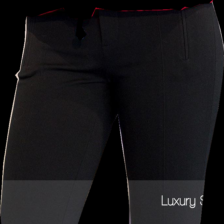

In [155]:
i = 22
img_id = train_df.loc[i]['ImageId']
img = Image.open('../datasets/imaterialist/train/'+img_id)

# rle = train_df.loc[i]['EncodedPixels']
rle = train_df.loc[i]['coco_rle']
crop_target(img, rle, bg=False)

In [156]:
# mask = rle_decode(rle, (img.size[1], img.size[0]))
mask = coco_mask.decode({"size":(img.size[1], img.size[0]), "counts":rle})

In [157]:
DOWN_SIZE = 344
if min(img.size)>DOWN_SIZE:
    mask = transforms.functional.resize(Image.fromarray(mask), DOWN_SIZE, interpolation=Image.NEAREST)
    img = transforms.functional.resize(img, DOWN_SIZE, interpolation=Image.BILINEAR)

In [158]:
ys, xs = np.where(mask)
box = np.array([[xs.min(), ys.min(), xs.max(), ys.max()]])
box

array([[ 98, 376, 268, 515]])

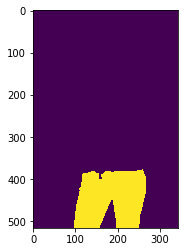

In [159]:
plt.imshow(mask)
plt.show()

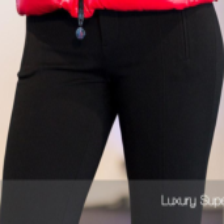

In [160]:
img_box = get_image_boxes(box, img, size=224)[0]
img_box